# **BERTOPIC**


In [25]:
from bertopic import BERTopic
from sklearn.decomposition import LatentDirichletAllocation 
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups

  0%|          | 0/18846 [03:39<?, ?it/s]


In [26]:
# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
documents = newsgroups.data

In [27]:
print("First 5 documents:")
for i in range(5):
    print(f"Document {i+1}:\n{documents[i]}\n{'-'*50}")

First 5 documents:
Document 1:
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


--------------------------------------------------
Document 2:
Fro

In [28]:
df = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})

# Add a column for target names
df['target_name'] = df['target'].apply(lambda x: newsgroups.target_names[x])

# Display the first 5 rows
print(df.head())

                                                text  target  \
0  From: Mamatha Devineni Ratnam <mr47+@andrew.cm...      10   
1  From: mblawson@midway.ecn.uoknor.edu (Matthew ...       3   
2  From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...      17   
3  From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...       3   
4  From: Alexander Samuel McDiarmid <am2o+@andrew...       4   

                target_name  
0          rec.sport.hockey  
1  comp.sys.ibm.pc.hardware  
2     talk.politics.mideast  
3  comp.sys.ibm.pc.hardware  
4     comp.sys.mac.hardware  


#Preprocessing

In [29]:
topic_model = BERTopic()
topics, prob = topic_model.fit_transform(documents)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitl

In [30]:
topic_model.get_topic_info()

Topic  Count                                     Name  \
0       -1   6634                        -1_to_the_and_for   
1        0    887                0_baseball_game_year_team   
2        1    198             1_gun_guns_militia_amendment   
3        2    155           2_atheists_atheism_god_atheist   
4        3    148            3_printer_deskjet_hp_printers   
..     ...    ...                                      ...   
349    348     10                 348_bmws_325is_bmw_miles   
350    349     10     349_love_god_dpsnasakodakcom_sincere   
351    350     10                350_iran_iranian_uae_gulf   
352    351     10  351_convex_visserconvexcom_visser_lance   
353    352     10            352_pluto_solar_mission_orbit   

                                        Representation  \
0       [to, the, and, for, of, in, is, you, from, it]   
1    [baseball, game, year, team, he, players, game...   
2    [gun, guns, militia, amendment, firearms, arms...   
3    [atheists, atheism, god, atheist, religion, fa...   
4    [printer, deskjet, hp, printers, laser, print,...   
..                                                 ...   
349  [bmws, 325is, bmw, miles, 060, 50k, saabs, die...   
350  [love, god, dpsnasakodakcom, sincere, givin, 4...   
351  [iran, iranian, uae, gulf, irans, abu, musa, i...   
352  [convex, visserconvexcom, visser, lance, colum...   
353  [pluto, solar, mission, orbit, hga, flyby, shi...   

                                   Representative_Docs  
0    [From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject:...  
1    [From: mjones@watson.ibm.com (Mike Jones)\nSub...  
2    [From: PA146008@utkvm1.utk.edu (David Veal)\nS...  
3    [From: muirm@argon.gas.organpipe.uug.arizona.e...  
4    [From: tchannon@black.demon.co.uk (Tim Channon...  
..                                                 ...  
349  [From: edwards@world.std.com (Jonathan Edwards...  
350  [From: kempmp@phoenix.oulu.fi (Petri Pihko)\nS...  
351  [From: brow2812@mach1.wlu.ca (craig brown 9210...  
352  [From: bjones@convex.com (Brad Jones)\nSubject...  
353  [From: nsmca@aurora.alaska.edu\nSubject: Satel...  

[354 rows x 5 columns]

In [31]:
topic_model.get_topic_info().head(10)#top 10

Topic  Count                             Name  \
0     -1   6634                -1_to_the_and_for   
1      0    887        0_baseball_game_year_team   
2      1    198     1_gun_guns_militia_amendment   
3      2    155   2_atheists_atheism_god_atheist   
4      3    148    3_printer_deskjet_hp_printers   
5      4    141    4_drivers_card_diamond_driver   
6      5    139         5_amp_sale_sony_speakers   
7      6    127          6_jpeg_gif_image_format   
8      7    125         7_forged_posts_your_post   
9      8    121  8_address_internet_please_email   

                                      Representation  \
0     [to, the, and, for, of, in, is, you, from, it]   
1  [baseball, game, year, team, he, players, game...   
2  [gun, guns, militia, amendment, firearms, arms...   
3  [atheists, atheism, god, atheist, religion, fa...   
4  [printer, deskjet, hp, printers, laser, print,...   
5  [drivers, card, diamond, driver, ati, windows,...   
6  [amp, sale, sony, speakers, stereo, amplifier,...   
7  [jpeg, gif, image, format, file, images, files...   
8  [forged, posts, your, post, infante, posting, ...   
9  [address, internet, please, email, list, maili...   

                                 Representative_Docs  
0  [From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject:...  
1  [From: mjones@watson.ibm.com (Mike Jones)\nSub...  
2  [From: PA146008@utkvm1.utk.edu (David Veal)\nS...  
3  [From: muirm@argon.gas.organpipe.uug.arizona.e...  
4  [From: tchannon@black.demon.co.uk (Tim Channon...  
5  [From: cannon@mksol.dseg.ti.com (Christopher C...  
6  [From: webb@itu1 (90-29265  Webber  AH)\nSubje...  
7  [From: tgl+@cs.cmu.edu (Tom Lane)\nSubject: JP...  
8  [From: infante@acpub.duke.edu (Andrew  Infante...  
9  [From: hrensin@eng.umd.edu (Howard M Rensin)\n...

Topic at -1, outliers
0 at corresponding to popular topic word at gun guns firearms weapons

In [32]:
topic_model.get_topic(0)

[('baseball', 0.007048593888996125),
 ('game', 0.00628497375573915),
 ('year', 0.005940962401838263),
 ('team', 0.005922677597570316),
 ('he', 0.005790816420054231),
 ('players', 0.0055394170863328086),
 ('games', 0.005150544161664034),
 ('braves', 0.005113128078937302),
 ('hit', 0.00502439744910322),
 ('runs', 0.004723289822009071)]

In [33]:
topic_model.get_representative_docs(1)

['From: PA146008@utkvm1.utk.edu (David Veal)\nSubject: Re: My Gun is like my American Express Card\nOrganization: University of Tennessee Division of Continuing Education\nLines: 134\n\nIn article <CMM.0.90.2.734911642.thomasp@surt.ifi.uio.no> Thomas Parsli <thomasp@ifi.uio.no> writes:\n>Overall Crime rate:\n>It fell....just like that...\n\n       Two questions:  When was this, and do you have the relevant\nnumbers.  (Please note, this is *not* in any way an indication I don\'t\nbelieve you or that you\'re not correct, but when the drop occured is\nrelevant.)\n   \n>Acquiring weapons in Norway:\n>You can buy (almost) all kinds of weapons in Norway, BUT you must have a \n>permit, and a good reason to get the permit....\n>If I would like to have a handgun, i would have to get an gun-licence from \n>the police and to be a member of a gun-club.\n\n       The primary objection (beyond ones based on the ideal of\nRKBA that it is simply not something the government should do) is\nthat it make

This shows topic is the keyword, whereas representative docs is email which we are not targetting

Make topics into Dataframe

In [34]:
topic_info = topic_model.get_topic_info()

#mapping topic IDs to topic representations
topic_names = topic_info.set_index('Topic')['Representation'].to_dict()


df = pd.DataFrame({"topic": topics, "document": [topic_names[t] for t in topics]})

df

topic                                           document
0        168  [pens, penguins, caps, devils, pittsburgh, gam...
1         53  [card, orchid, vlb, p9000, cards, video, s3, f...
2         58  [armenians, were, azerbaijan, her, she, they, ...
3         51  [scsi, ide, scsi2, scsi1, dma, bus, controller...
4        125  [tape, backup, tapes, jumbo, munroe, drive, 25...
...      ...                                                ...
18841    126  [migraine, pain, migraines, headache, banks, f...
18842    230  [wire, wiring, ground, neutral, outlets, outle...
18843     77  [cpu, fan, heat, sink, fans, hot, computationa...
18844     80  [sphere, points, den, radius, circle, plane, e...
18845     90  [mustang, ford, sho, car, taurus, camaro, cars...

[18846 rows x 2 columns]

In [35]:
topic_model.visualize_topics()

How to visualize:
-Bigger bubble shows the more popular topics where the 20newgroups data consist the most
-Topic 2 (address,email,mailing) and smaller bubble topic 199(pat,express,online,communications) are at the same spot which could mean relevant to an specific event where -both news topic are heated at the same area
-Topic 228(wheelie,wheelies,shaftdrives) at D2 top, while Topic 254(koresh, griffen, children) at bottom are the further apart. This shows that these 2 event are not as relevant or similar

In [36]:
topic_model.visualize_barchart(top_n_topics=40)

# Things to do?
### -Topic Label
### -Refit model
### -Merge topics
### -Find specific topic
### -Evaluation

Topic labelling

In [37]:
topic_labels = topic_model.generate_topic_labels(nr_words=3, topic_prefix=False, word_length=15, separator=" - ")
topic_model.set_topic_labels(topic_labels)

In [38]:
# 2. Add Custom Labels (Optional)
# Example: Label topic 0 as "Computer Hardware" and topic 1 as "Religion and Atheism"
#topic_model.set_topic_labels({0: "gun", 1: "server"})

In [39]:
topic_info = topic_model.get_topic_info()
print(topic_info.head(10)) 

   Topic  Count                             Name                   CustomName  \
0     -1   6634                -1_to_the_and_for               to - the - and   
1      0    887        0_baseball_game_year_team       baseball - game - year   
2      1    198     1_gun_guns_militia_amendment         gun - guns - militia   
3      2    155   2_atheists_atheism_god_atheist     atheists - atheism - god   
4      3    148    3_printer_deskjet_hp_printers       printer - deskjet - hp   
5      4    141    4_drivers_card_diamond_driver     drivers - card - diamond   
6      5    139         5_amp_sale_sony_speakers            amp - sale - sony   
7      6    127          6_jpeg_gif_image_format           jpeg - gif - image   
8      7    125         7_forged_posts_your_post        forged - posts - your   
9      8    121  8_address_internet_please_email  address - internet - please   

                                      Representation  \
0     [to, the, and, for, of, in, is, you, from, it]

refitting model

In [40]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

# Load a sample dataset
docs = fetch_20newsgroups(subset='all')['data'][:1000]  # Use a smaller subset for testing

# Initialize and fit BERTopic
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

topic_model.update_topics(docs, n_gram_range=(1, 2))
print(topic_model.get_topic_info())

   Topic  Count             Name  \
0      0    894  0_the_to_of_and   
1      1    106  1_the_in_to_and   

                                    Representation  \
0   [the, to, of, and, in, is, that, it, for, you]   
1  [the, in, to, and, of, that, is, he, for, from]   

                                 Representative_Docs  
0  [From: Clinton-HQ@Campaign92.Org (Clinton/Gore...  
1  [From: mblumens@itsmail1.hamilton.edu (Mary Bl...  


Merge topic

In [41]:
topics_to_merge = [1, 2]
valid_topics = topic_info['Topic'].tolist()


Find specific topic

In [42]:
topic_model.find_topics("guns", top_n= 1)
topic_keywords = topic_model.get_topic(0)
print(topic_keywords)


[('the', 0.0775488269281029), ('to', 0.047044051585846985), ('of', 0.04629339471457369), ('and', 0.038362048894816), ('in', 0.033191745614634366), ('is', 0.03142185726035665), ('that', 0.029913023900891685), ('it', 0.023529890921090365), ('for', 0.02218963425141174), ('you', 0.020576120555622617)]


In [43]:
# Find the most relevant topic for the query "guns"
topic_ids, similarity_scores = topic_model.find_topics("guns", top_n=1)

# Output the results
print(f"Most relevant topic ID: {topic_ids}")
print(f"Similarity score: {similarity_scores}")

# Inspect the topic's keywords
topic_keywords = topic_model.get_topic(topic_ids[0])
print(f"Keywords for topic {topic_ids[0]}: {topic_keywords}")

Most relevant topic ID: [0]
Similarity score: [0.4095556837254242]
Keywords for topic 0: [('the', 0.0775488269281029), ('to', 0.047044051585846985), ('of', 0.04629339471457369), ('and', 0.038362048894816), ('in', 0.033191745614634366), ('is', 0.03142185726035665), ('that', 0.029913023900891685), ('it', 0.023529890921090365), ('for', 0.02218963425141174), ('you', 0.020576120555622617)]


Evaluation- Diversity score

In [44]:
# topic_model.visualize_topics()
# probs = topic_model.transform(docs)[1]

# from bertopic.evaluation import diversity_score
# diversity_score(topic_model)


2025-03-29 18:33:52,102 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2025-03-29 18:33:58,473 - BERTopic - Embedding - Completed ✓
2025-03-29 18:33:58,474 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-29 18:33:59,036 - BERTopic - Dimensionality - Completed ✓
2025-03-29 18:33:59,037 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-29 18:33:59,056 - BERTopic - Cluster - Completed ✓
2025-03-29 18:33:59,056 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-03-29 18:33:59,266 - BERTopic - Representation - Completed ✓
2025-03-29 18:33:59,266 - BERTopic - Topic reduction - Reducing number of topics
2025-03-29 18:33:59,267 - BERTopic - Topic reduction - Number of topics (8) is equal or higher than the clustered topics(3).
2025-03-29 18:33:59,267 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-03-29 18:33:59,529 - BERTopic - Representation - Completed ✓
/opt/homebrew/anaconda3/envs/py39_env/lib/python3.9/site-packages/umap/spectra

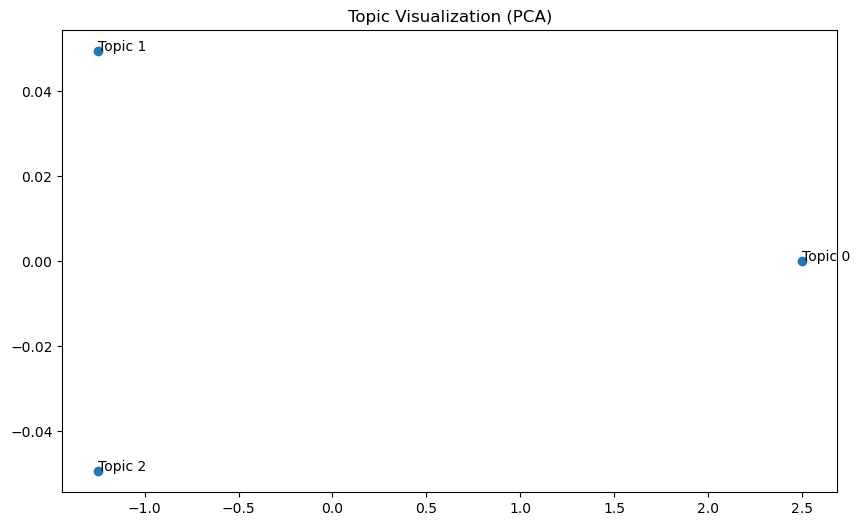

In [45]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
import numpy as np

# Load sample data
docs = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))['data'][:1000]

# Initialize BERTopic with optimized parameters
topic_model = BERTopic(
    min_topic_size=20,            # Increased minimum topic size
    calculate_probabilities=True,
    nr_topics=8,                  # Fixed number of topics
    low_memory=True,
    verbose=True,           
    n_gram_range=(1, 2)  
)

# Fit the model
topics, probs = topic_model.fit_transform(docs)

# Manual visualization workaround
def safe_visualize_topics(model):
    """Custom visualization that handles the sparse matrix issue"""
    try:
        return model.visualize_topics()
    except:
        # Convert sparse matrix to dense
        dense_embeddings = model.c_tf_idf_.toarray()
        # Use PCA instead of UMAP for more stable reduction
        from sklearn.decomposition import PCA
        reduced = PCA(n_components=2).fit_transform(dense_embeddings)
        
        # Create manual plot
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 6))
        plt.scatter(reduced[:, 0], reduced[:, 1])
        for i in range(len(reduced)):
            plt.text(reduced[i, 0], reduced[i, 1], f"Topic {i}")
        plt.title("Topic Visualization (PCA)")
        plt.show()

# Generate visualizations
safe_visualize_topics(topic_model)  # Custom visualization
topic_model.visualize_distribution(probs[0]).show()  # This should work
topic_model.visualize_hierarchy().show()  # This should work

In [46]:
def calculate_diversity(topic_model, top_n=10):
    """Manual topic diversity calculation (higher = better, range 0-1)"""
    topics = topic_model.get_topics()
    unique_words = set()
    total_words = 0
    
    for topic_id, words in topics.items():
        if topic_id == -1:  # Skip outliers
            continue
        top_words = [word for word, _ in words[:top_n]]
        unique_words.update(top_words)
        total_words += len(top_words)
    
    return len(unique_words) / total_words if total_words > 0 else 0

div_score = calculate_diversity(topic_model)
print(f"Diversity Score: {div_score:.3f}")

Diversity Score: 0.667


In [47]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

# 1. Load data
docs = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))['data'][:1000]

# 2. Initialize and fit model
topic_model = BERTopic(
    min_topic_size=15,
    nr_topics=10,
    calculate_probabilities=True
)

# Fit and transform (returns flat topics list and probability matrix)
topics, probs = topic_model.fit_transform(docs)

# 3. Verify results
print(f"Number of documents: {len(docs)}")
print(f"Topics assigned: {len(topics)}")  # Should match document count
print(f"Unique topics found: {len(set(topics))}")  # Now works with flat list
print(f"Probability matrix shape: {probs.shape}")  # (n_docs, n_topics)

# Get topic info
topic_info = topic_model.get_topic_info()
print("\nTopic Statistics:")
print(topic_info[['Topic', 'Count', 'Name']].head(10))

Number of documents: 1000
Topics assigned: 1000
Unique topics found: 3
Probability matrix shape: (1000, 3)

Topic Statistics:
   Topic  Count                          Name
0      0     32  0_testing_deletion_hello_was
1      1    875               1_the_to_of_and
2      2     93               2_the_to_and_in


In [48]:
from sklearn.metrics import silhouette_score
import numpy as np

# 1. Get document embeddings (excluding outliers)
valid_mask = np.array(topics) != -1  # Filter out outliers (-1)
valid_embeddings = topic_model.embedding_model.embed_documents(np.array(docs)[valid_mask])
valid_topics = np.array(topics)[valid_mask]

# 2. Calculate silhouette score (only if we have multiple topics)
if len(set(valid_topics)) > 1:
    silhouette = silhouette_score(valid_embeddings, valid_topics)
    print(f"\nSilhouette Score: {silhouette:.3f}")
    print("Interpretation:")
    print("- Closer to 1: Well-separated clusters")
    print("- Near 0: Overlapping clusters") 
    print("- Negative: Incorrect clustering")
else:
    print("Cannot compute silhouette score - only 1 topic found (excluding outliers)")


Silhouette Score: 0.029
Interpretation:
- Closer to 1: Well-separated clusters
- Near 0: Overlapping clusters
- Negative: Incorrect clustering


In [49]:
# Use document embeddings instead
from sentence_transformers import SentenceTransformer
embeddings = SentenceTransformer("all-MiniLM-L6-v2").encode(docs)
score = silhouette_score(embeddings, topics)
print(f"Fallback Silhouette Score: {score:.3f}")

Fallback Silhouette Score: 0.029


# **LDA** (Laten Dirichlet Allocation)

![LDA Topic Model](image.png)


-LDA looks at all the words in all the documents and tries to figure out which words are most likely to belong to which topics.
E.g The word 'Ball', 'Score', appears many time in these documents, maybe there is a topic about sports

In [95]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import gensim
from gensim import corpora
import numpy as np
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [96]:
LDA_newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
LDA_docs = LDA_newsgroups.data

In [97]:
stop_words = stopwords.words('english')

Why Use CountVectorizer?
Tokenization: Automatically splits documents into words.

Stopword Removal: Removes common stopwords (e.g., "the," "and," "is").

Bag-of-Words Representation: Converts documents into a matrix of word counts, which is the input format required by LDA.

In [98]:
# Preprocess for LDA
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(LDA_docs)


In [99]:
lda_sklearn = LatentDirichletAllocation()
lda_sklearn.fit(X)

LatentDirichletAllocation()

In [100]:
# Convert scikit-learn's X to Gensim's corpus
corpus_gensim = gensim.matutils.Sparse2Corpus(X.transpose())

In [101]:
# Create Gensim dictionary
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())
dictionary = corpora.Dictionary.from_corpus(corpus_gensim, id2word=id2word)

# Convert scikit-learn's LDA model to Gensim's LDA model
lda_gensim = gensim.models.ldamodel.LdaModel(
    corpus=corpus_gensim,
    id2word=dictionary,
    num_topics=lda_sklearn.n_components,
    random_state=42,
    passes=10, 
    alpha='auto',
    eta='auto'
)

In [102]:
print("Topics discovered by LDA:")
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_sklearn.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

Topics discovered by LDA:
Topic 0:
0d _o adl 145 jehovah elohim istanbul bullock professor mu
Topic 1:
game team year games ca hockey players play season last
Topic 2:
god edu one would people subject writes lines think organization
Topic 3:
would people one com government us think know right said
Topic 4:
edu subject organization lines com posting nntp host writes article
Topic 5:
space nasa gov also information one may system db use
Topic 6:
edu use file com subject lines organization one would windows
Topic 7:
edu subject lines organization com 00 drive card dos windows
Topic 8:
ax max g9v b8f a86 pl 145 1d9 34u 0t
Topic 9:
edu com writes article lines subject organization would people one


visualization

In [103]:
# Prepare pyLDAvis visualization
vis = gensimvis.prepare(lda_gensim, corpus_gensim, dictionary)

# Display pyLDAvis visualization
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Get the dataset into bag of word

In [104]:
# Get the vocabulary (words) and their counts
word_counts = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1))

# Sort words by counts in descending order
sorted_word_counts = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)

# Print the top N words and their counts
top_n = 11  
for i, (word, count) in enumerate(sorted_word_counts[:top_n]):
    print(f"{i} {word} {count}")


0 ax 62416
1 edu 35703
2 subject 20379
3 com 20223
4 lines 19669
5 organization 18709
6 would 14825
7 one 14621
8 writes 13344
9 article 12275
10 like 9697


Get the Topic probabilities sorted scores in Bag of Words


In [105]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import gensim
from gensim import corpora
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')

# Load data
LDA_newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
LDA_docs = LDA_newsgroups.data

# Improved stop words
stop_words = stopwords.words('english')
custom_stop_words = ["edu", "com", "subject", "lines", "organization", "would", "article", "writes", "university", "one", "people", "god"]
stop_words.extend(custom_stop_words)

# Lemmatization
lemmatizer = WordNetLemmatizer()
LDA_docs_lemmatized = [" ".join([lemmatizer.lemmatize(word) for word in doc.split()]) for doc in LDA_docs]

# Preprocess for LDA using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, max_df=0.95, min_df=2, max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(LDA_docs_lemmatized)

# Convert TF-IDF matrix to Gensim corpus
corpus_tfidf = gensim.matutils.Sparse2Corpus(X_tfidf.transpose())

# Create Gensim dictionary
id2word = dict((v, k) for k, v in tfidf_vectorizer.vocabulary_.items())
dictionary = corpora.Dictionary.from_corpus(corpus_tfidf, id2word=id2word)

# Replace LdaMulticore with LdaModel
lda_model_tfidf = gensim.models.LdaModel(
    corpus=corpus_tfidf,
    num_topics=15,
    id2word=dictionary,
    passes=10,
    alpha='auto',  # Now allowed
    eta='auto',
    chunksize=1000,  # Adjust chunk size for efficiency
    random_state=42
)

# Print the topics
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/TanJunHeng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/TanJunHeng/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Topic: 0 Word: 0.032*"ingr" + 0.029*"receiver" + 0.028*"novell" + 0.025*"custom" + 0.025*"behanna" + 0.025*"philips" + 0.025*"dresden" + 0.024*"kim" + 0.023*"intergraph" + 0.022*"umanitoba"
Topic: 1 Word: 0.017*"adobe" + 0.017*"gateway" + 0.015*"des" + 0.014*"3d" + 0.014*"natural" + 0.013*"craig" + 0.013*"msg" + 0.013*"princeton" + 0.012*"widget" + 0.012*"jerry"
Topic: 2 Word: 0.006*"wa" + 0.004*"ha" + 0.004*"like" + 0.004*"know" + 0.003*"think" + 0.003*"get" + 0.003*"cs" + 0.003*"time" + 0.003*"good" + 0.003*"also"
Topic: 3 Word: 0.046*"dartmouth" + 0.028*"josh" + 0.028*"bitmap" + 0.024*"hydro" + 0.022*"levine" + 0.022*"xpert" + 0.021*"jody" + 0.021*"eve" + 0.020*"sps" + 0.019*"den"
Topic: 4 Word: 0.018*"sg" + 0.018*"shuttle" + 0.017*"hst" + 0.014*"jsc" + 0.014*"dyer" + 0.014*"instruction" + 0.013*"ic" + 0.012*"dcs" + 0.012*"oakland" + 0.011*"v6"
Topic: 5 Word: 0.032*"buffalo" + 0.023*"alaska" + 0.019*"mcgill" + 0.016*"jake" + 0.016*"9760" + 0.013*"eos" + 0.013*"lcs" + 0.012*"tektroni

In [106]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis


# Prepare the visualization
vis_data = gensimvis.prepare(lda_model_tfidf, corpus_tfidf, dictionary)
pyLDAvis.display(vis_data)

Coherence Score (c_v, u_mass, etc.)
Perplexity (lower = better)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/TanJunHeng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/TanJunHeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1: Loss = 9.8125
Epoch 2: Loss = 9.1591
Epoch 3: Loss = 9.0808
Epoch 4: Loss = 9.1084
Epoch 5: Loss = 9.1608
Epoch 6: Loss = 9.2184
Epoch 7: Loss = 9.2751
Epoch 8: Loss = 9.3286
Epoch 9: Loss = 9.3787
Epoch 10: Loss = 9.4252
Epoch 11: Loss = 9.4685
Epoch 12: Loss = 9.5089
Epoch 13: Loss = 9.5464
Epoch 14: Loss = 9.5818
Epoch 15: Loss = 9.6150


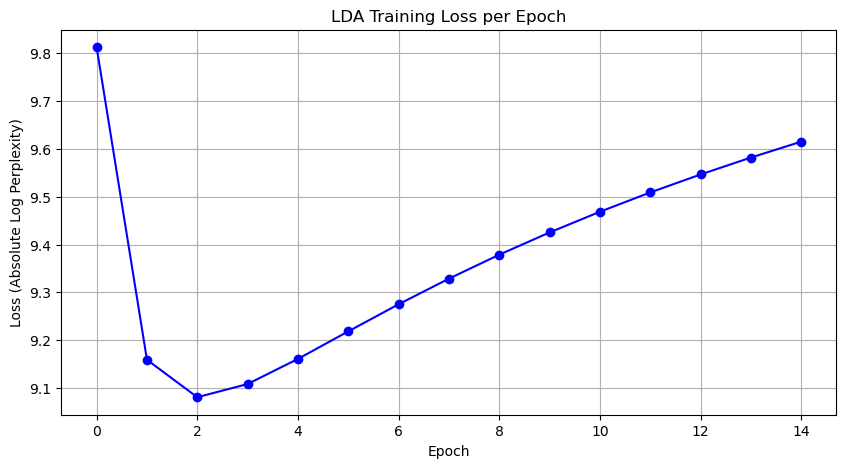

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 


Coherence Score (c_v): 0.3399
Final Perplexity: -9.6150


In [121]:
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from gensim.models import LdaModel, CoherenceModel
from gensim.corpora import Dictionary
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# 1. Load and preprocess data
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word not in stop_words and len(word) > 3]

tokenized_docs = [preprocess(doc) for doc in newsgroups.data[:500]]

# 2. Create dictionary and corpus
id2word = Dictionary(tokenized_docs)
corpus = [id2word.doc2bow(doc) for doc in tokenized_docs]

# 3. Manual training with progress tracking
perplexities = []
for epoch in range(15):  # Number of passes
    # Create new model if first epoch, else continue training
    if epoch == 0:
        lda_model = LdaModel(
            corpus=corpus,
            id2word=id2word,
            num_topics=10,
            random_state=42,
            passes=1,
            iterations=50,
            alpha='auto'
        )
    else:
        lda_model.update(corpus)
    
    # Calculate and store perplexity
    perplexity = abs(lda_model.log_perplexity(corpus))
    perplexities.append(perplexity)
    print(f"Epoch {epoch+1}: Loss = {perplexity:.4f}")

# 4. Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(perplexities, marker='o', linestyle='-', color='b')
plt.title('LDA Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss (Absolute Log Perplexity)')
plt.grid(True)
plt.show()

# 5. Evaluation Metrics
coherence_model = CoherenceModel(
    model=lda_model,
    texts=tokenized_docs,
    dictionary=id2word,
    coherence='c_v'
)
print(f"\nCoherence Score (c_v): {coherence_model.get_coherence():.4f}")
print(f"Final Perplexity: {lda_model.log_perplexity(corpus):.4f}")

# **Word2Vec**

What can you do?
- using word2vec by gensim(skip gram)
- using word2vec by tensorflow.keras(skip gram)
- custom word2vec
- word2vec + Clustering

#Gensim Word2Vec

In [124]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import nltk

In [125]:
# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

In [126]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/TanJunHeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [127]:
# create a function to preprocess and select word and cleaning
def preprocess_text(text):
    # Remove emails and URLs
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Lowercase and tokenize
    tokens = text.lower().split()
    # Remove stopwords and short tokens
    stop_words = set(stopwords.words('english'))
    custom_stopwords = {"would", "one", "article", "writes", "subject"}
    return [word for word in tokens if word not in stop_words and word not in custom_stopwords and len(word) > 2]



processed_data = [preprocess_text(doc) for doc in newsgroups.data]

In [128]:
# Train the Word2Vec model using skip-gram
model = Word2Vec(
    sentences=processed_data,
    vector_size=100,    # Dimensionality of word vectors
    window=5,           # Maximum distance between current and predicted word
    min_count=5,        # Ignore words with lower frequency
    workers=4,          # Number of CPU cores
    sg=1,               # Use skip-gram (1 = skip-gram, 0 = CBOW)
    epochs=10           # Number of training iterations
)

In [129]:
# Select a subset of words to visualize
selected_words = [
    'computer', 'software', 'data', 'government', 'religion',
    'science', 'car', 'hockey', 'baseball', 'encryption',
    'algorithm', 'network', 'bible', 'space', 'medical'
]


# Filter words existing in vocabulary
valid_words = [word for word in selected_words if word in model.wv]
print("Words in vocabulary:", valid_words)

# Get vectors for valid words
vectors = [model.wv[word] for word in valid_words]

Words in vocabulary: ['computer', 'software', 'data', 'government', 'religion', 'science', 'car', 'hockey', 'baseball', 'encryption', 'algorithm', 'network', 'bible', 'space', 'medical']


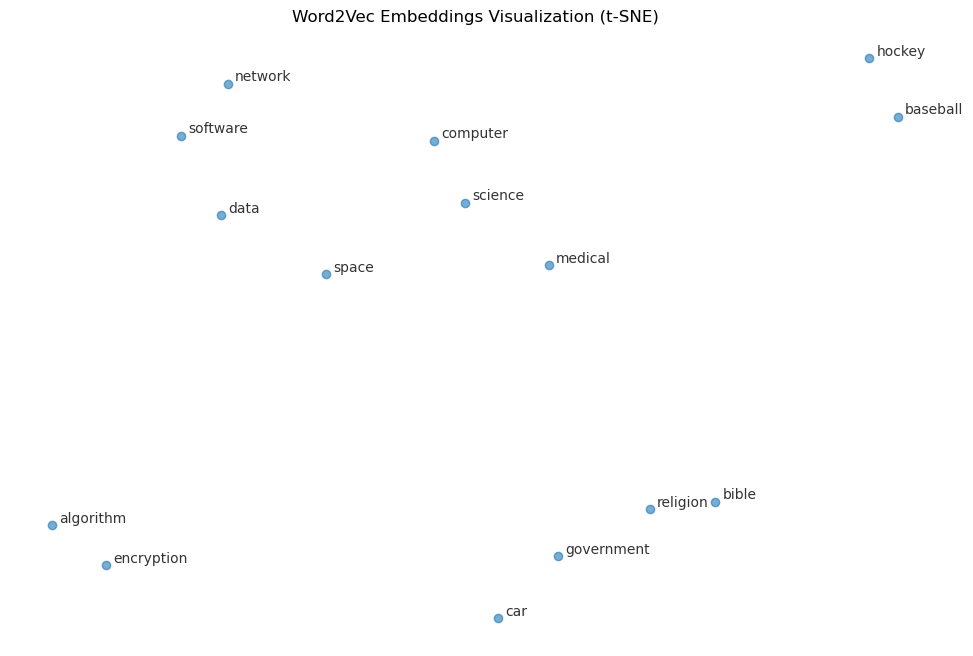

In [130]:
# t-SNE visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=3)
vectors_tsne = tsne.fit_transform(np.array(vectors))

# Create DataFrame for plotting
df = pd.DataFrame(vectors_tsne, columns=['x', 'y'])
df['word'] = valid_words

# Plot settings
plt.figure(figsize=(12, 8))
plt.scatter(df['x'], df['y'], alpha=0.6)

# Add annotations
for i, row in df.iterrows():
    plt.annotate(
        row['word'],
        (row['x'], row['y']),
        xytext=(5, 2),
        textcoords='offset points',
        fontsize=10,
        alpha=0.8
    )

plt.title("Word2Vec Embeddings Visualization (t-SNE)")
plt.axis('off')
plt.show()

In [131]:
# Find similar words
def show_similarity(word):
    if word in model.wv:
        print(f"\nWords similar to '{word}':")
        for similar, score in model.wv.most_similar(word, topn=5):
            print(f"{similar}: {score:.3f}")
    else:
        print(f"'{word}' not in vocabulary")

# Example queries
show_similarity('computer')
show_similarity('science')
show_similarity('hockey')


Words similar to 'computer':
science: 0.699
mathcomputer: 0.678
daimi: 0.662
dep: 0.637
mengstratuscom: 0.632

Words similar to 'science':
computer: 0.699
maths: 0.692
bloomington: 0.692
dep: 0.690
warwick: 0.686

Words similar to 'hockey':
tournament: 0.751
championship: 0.701
petes: 0.699
ncaa: 0.699
glens: 0.693


#using word2vec by tensorflow.keras(skip gram)

In [132]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import skipgrams
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [133]:
# Larger sample corpus for meaningful training
corpus = [
    "the cat loves fish and milk",
    "the person hates fish but likes chicken",
    "dogs enjoy bones while cats prefer fish",
    "people love pizza but hate vegetables",
    "programmers enjoy coffee and code daily"
]

In [134]:
# Tokenization with OOV handling
tokenizer = Tokenizer(oov_token="<UNK>")
tokenizer.fit_on_texts(corpus)
word_to_ix = tokenizer.word_index
vocab_size = len(word_to_ix) + 1  # +1 for padding

In [135]:
def generate_training_data(corpus, window_size, negative_ratio):
    targets = []
    contexts = []
    labels = []
    
    for sentence in corpus:
        tokenized = tokenizer.texts_to_sequences([sentence])[0]
        if not tokenized:  # Skip empty sequences
            continue
            
        # Generate positive pairs
        for i, target in enumerate(tokenized):
            start = max(0, i - window_size)
            end = min(len(tokenized), i + window_size + 1)
            for j in range(start, end):
                if j != i and 0 < j < len(tokenized):
                    context = tokenized[j]
                    # Add positive sample
                    targets.append(target)
                    contexts.append(context)
                    labels.append(1)
                    
                    # Add negative samples
                    for _ in range(negative_ratio):
                        neg_context = np.random.randint(1, vocab_size)
                        while neg_context == context:
                            neg_context = np.random.randint(1, vocab_size)
                        targets.append(target)
                        contexts.append(neg_context)
                        labels.append(0)
    
    return np.array(targets), np.array(contexts), np.array(labels)

# Generate training data
window_size = 2
negative_ratio = 4  # Number of negative samples per positive sample
targets, contexts, labels = generate_training_data(corpus, window_size, negative_ratio)


In [136]:
class SkipGramModel(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim):
        super(SkipGramModel, self).__init__()
        self.target_embedding = layers.Embedding(
            vocab_size, 
            embedding_dim,
            embeddings_initializer='glorot_uniform',
            name="target_embedding"
        )
        self.context_embedding = layers.Embedding(
            vocab_size,
            embedding_dim,
            embeddings_initializer='glorot_uniform',
            name="context_embedding"
        )
        
    def call(self, pair):
        target, context = pair
        # Get embeddings (batch_size, embedding_dim)
        word_emb = self.target_embedding(target)
        context_emb = self.context_embedding(context)
        
        # Calculate dot product (batch_size,)
        dots = tf.reduce_sum(word_emb * context_emb, axis=1)
        
        return dots

In [137]:
# Model parameters
embedding_dim = 128
model = SkipGramModel(vocab_size, embedding_dim)

In [138]:
# Custom loss function for skip-gram
def custom_loss(y_true, y_pred):
    return tf.keras.losses.binary_crossentropy(
        y_true, 
        tf.sigmoid(y_pred)  # Apply sigmoid activation
    )



In [139]:
# Compile with Adam optimizer
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=custom_loss,
    metrics=['accuracy']
)

history = model.fit(
    x=(targets, contexts),
    y=labels,
    batch_size=64,
    epochs=50,
    validation_split=0.2,
    verbose=1  # Show progress
)

# Get embeddings
word_embeddings = model.target_embedding.get_weights()[0]

Epoch 1/50
6/6 [==============================] - 0s 10ms/step - loss: 0.6991 - accuracy: 0.0000e+00 - val_loss: 0.6944 - val_accuracy: 0.0000e+00
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.0000e+00 - val_loss: 0.6942 - val_accuracy: 0.0000e+00
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.0000e+00 - val_loss: 0.6940 - val_accuracy: 0.0000e+00
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.0000e+00 - val_loss: 0.6940 - val_accuracy: 0.0000e+00
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.0000e+00 - val_loss: 0.6939 - val_accuracy: 0.0000e+00
Epoch 6/50
6/6 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.1667 - val_loss: 0.6938 - val_accuracy: 0.0000e+00
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.1667 - val_loss: 0.6938 - val_accura

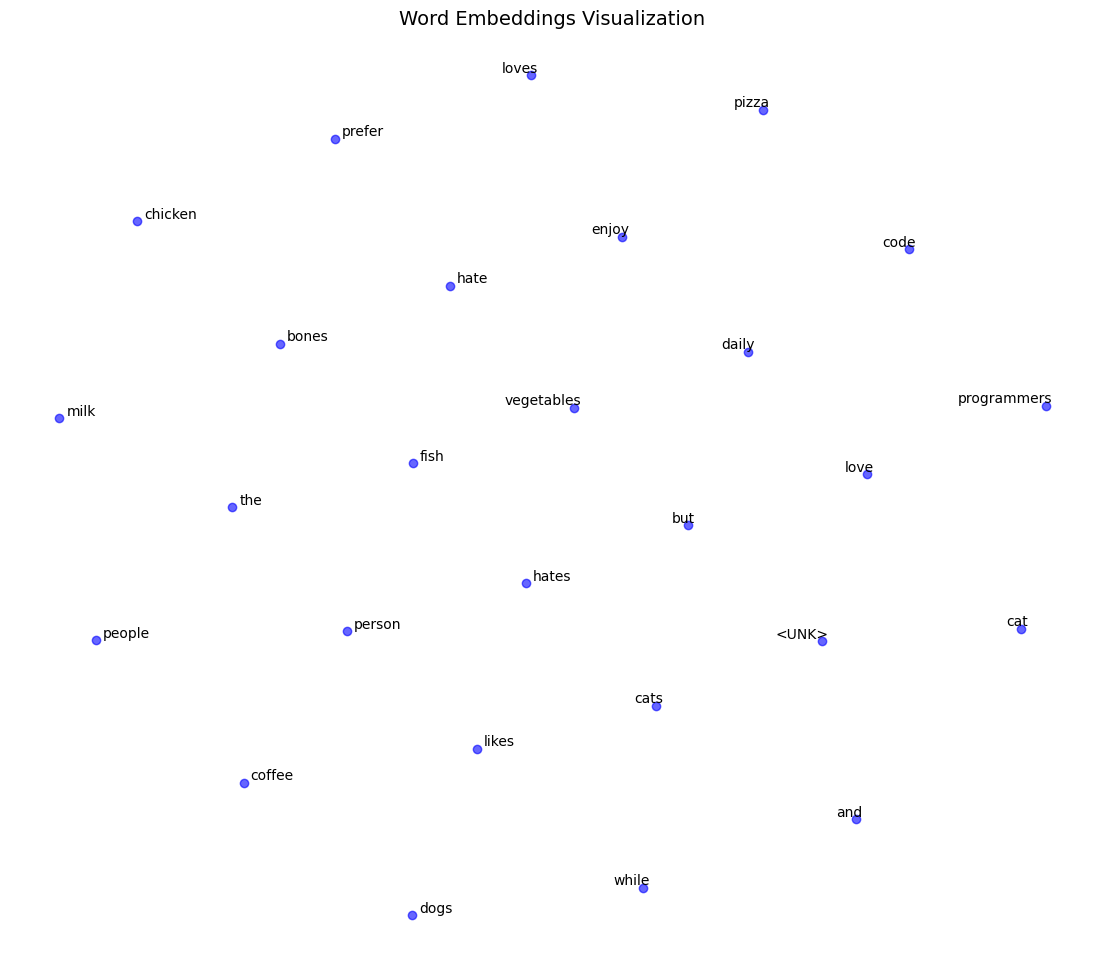

In [140]:
def plot_embeddings(embeddings, word_index):
    # Calculate the number of samples
    n_samples = len(word_index)

    # Calculate a suitable perplexity
    perplexity = min(n_samples - 1, 30)  # Ensure perplexity is less than n_samples

    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity) # Added perplexity

    # Create ordered word list based on indices
    index_to_word = {idx: word for word, idx in word_index.items()}
    sorted_indices = sorted(index_to_word.keys())
    ordered_words = [index_to_word[idx] for idx in sorted_indices]

    # Get embeddings in index order (skip padding at 0)
    ordered_embeddings = np.array([embeddings[idx] for idx in sorted_indices])

    # Reduce dimensionality
    reduced = tsne.fit_transform(ordered_embeddings)

    # Plot
    plt.figure(figsize=(14, 12))
    for i, word in enumerate(ordered_words):
        plt.scatter(reduced[i, 0], reduced[i, 1], color='blue', alpha=0.6)
        plt.annotate(
            word,
            (reduced[i, 0], reduced[i, 1]),
            xytext=(5, 2),
            textcoords="offset points",
            fontsize=10,
            ha='right' if reduced[i, 0] > 0 else 'left'
        )
    plt.title("Word Embeddings Visualization", fontsize=14)
    plt.axis('off')
    plt.show()

# Assuming you have 'model' and 'word_to_ix' defined elsewhere
# Generate embeddings and plot
word_embeddings = model.target_embedding.get_weights()[0]
plot_embeddings(word_embeddings, word_to_ix)

In [141]:
# Find similar words
def find_similar(word, word_to_ix, word_embeddings, tokenizer, top_n=5):
    if word not in word_to_ix:
        return f"{word} not in vocabulary"

    word_vec = word_embeddings[word_to_ix[word]]
    similarities = np.dot(word_embeddings, word_vec)
    similar_indices = np.argsort(-similarities)[1:top_n+1]  # Skip self

    # Create a reverse index mapping from the word to index dictionary
    ix_to_word = {v: k for k, v in tokenizer.word_index.items()}

    return [(ix_to_word[idx], similarities[idx])
            for idx in similar_indices if idx in ix_to_word]

# Example Usage (assuming you have these variables)
print("Similar to 'fish':", find_similar('fish', word_to_ix, word_embeddings, tokenizer))
print("Similar to 'code':", find_similar('code', word_to_ix, word_embeddings, tokenizer))

Similar to 'fish': [('cats', 1.9149063), ('the', 1.7815317), ('and', 1.7694435), ('but', 1.5977738), ('hates', 1.4741347)]
Similar to 'code': [('dogs', 0.1549359), ('<UNK>', 0.14228317), ('programmers', 0.13485551), ('pizza', 0.053709753), ('enjoy', 0.02965141)]


Custom word2vec


In [142]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import string
import re
from tqdm import tqdm
import os

In [143]:
# ### Manualling installing resouces
# import os
# import shutil
# import urllib.request
# import zipfile
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords

# # 1. SETUP ENVIRONMENT
# nltk_data_path = '/Users/TanJunHeng/nltk_data_final'
# os.makedirs(nltk_data_path, exist_ok=True)
# nltk.data.path = [nltk_data_path]

# # 2. MANUAL INSTALLATION FUNCTION
# def manual_install(resource, url):
#     print(f"Manually installing {resource}...")
#     try:
#         # Create target directory
#         target_dir = os.path.join(nltk_data_path, os.path.dirname(resource))
#         os.makedirs(target_dir, exist_ok=True)
        
#         # Download and extract
#         zip_path = os.path.join(nltk_data_path, f"{os.path.basename(resource)}.zip")
#         urllib.request.urlretrieve(url, zip_path)
        
#         with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#             zip_ref.extractall(target_dir)
        
#         os.remove(zip_path)
#         print(f"✓ Successfully installed {resource}")
#         return True
#     except Exception as e:
#         print(f"✗ Failed to install {resource}: {str(e)}")
#         return False

# # 3. INSTALL PUNKT (with all required components)
# punkt_resources = [
#     ('tokenizers/punkt', 'https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/tokenizers/punkt.zip'),
#     ('tokenizers/punkt_tab', 'https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/tokenizers/punkt_tab.zip')
# ]

# for resource, url in punkt_resources:
#     if not manual_install(resource, url):
#         print("Please download manually from:")
#         print(url)
#         print(f"And extract to: {os.path.join(nltk_data_path, resource)}")

# # 4. INSTALL STOPWORDS
# if not manual_install('corpora/stopwords', 'https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/stopwords.zip'):
#     print("Please download manually from:")
#     print("https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/stopwords.zip")
#     print(f"And extract to: {os.path.join(nltk_data_path, 'corpora/stopwords')}")

# # 5. VERIFICATION
# print("\n=== VERIFYING INSTALLATION ===")
# try:
#     # Test punkt
#     tokens = word_tokenize("This is a test sentence.")
#     print("✓ Punkt tokenizer working")
#     print(f"Sample tokens: {tokens}")
    
#     # Test stopwords
#     stops = stopwords.words('english')
#     print("✓ Stopwords working")
#     print(f"Sample stopwords: {stops[:5]}")
    
#     print("\n=== ALL NLTK RESOURCES WORKING ===")
# except Exception as e:
#     print("\n=== FINAL INSTALLATION FAILED ===")
#     print("Please manually download these files:")
#     print("1. Punkt: https://github.com/nltk/nltk_data/tree/gh-pages/packages/tokenizers")
#     print("2. Stopwords: https://github.com/nltk/nltk_data/tree/gh-pages/packages/corpora")
#     print(f"And place them in: {nltk_data_path}")
#     print("Required structure:")
#     print("nltk_data_final/")
#     print("├── tokenizers/")
#     print("│   ├── punkt/")
#     print("│   └── punkt_tab/")
#     print("└── corpora/")
#     print("    └── stopwords/")

In [144]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


# Force NLTK to use the user's NLTK data directory
nltk.data.path = ['/Users/TanJunHeng/nltk_data']

# Download punkt resource if it's not present
try:
  word_tokenize("test") # Test if punkt is present
except LookupError:
  nltk.download('punkt', download_dir='/Users/TanJunHeng/nltk_data')



# Fetch the dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/TanJunHeng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/TanJunHeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [145]:
def preprocess_text(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return []

    # Text cleaning
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization with error handling
    try:
        tokens = word_tokenize(text)
    except LookupError:
        nltk.download('punkt', download_dir='/Users/TanJunHeng/nltk_data')
        tokens = word_tokenize(text)

    # Filter tokens
    stop_words = set(nltk.corpus.stopwords.words('english'))
    return [word for word in tokens if word not in stop_words and len(word) > 2]

# Example: Preprocess with progress bar (you must define `documents` before this)
processed_docs = [preprocess_text(doc) for doc in tqdm(documents)]


100%|██████████| 18846/18846 [00:05<00:00, 3530.43it/s]


In [146]:
# Create and train the Word2Vec model
model = Word2Vec(
    sentences=processed_docs,
    vector_size=150,    # Increased vector size
    window=8,           # Larger context window
    min_count=15,       # Filter rare words
    workers=8,          # Use more CPU cores
    sg=1,               # Skip-gram architecture
    negative=10,        # Negative sampling
    epochs=20           # More training iterations
)



In [147]:
# Example of using the model
print(model.wv['computer']) # Get the vector for the word 'computer'
print(model.wv.most_similar('computer', topn=5)) # Find the most similar words to 'computer'

[-1.30342051e-01 -2.79613942e-01  7.02279434e-02  1.42185047e-01
 -3.68676722e-01  1.80604652e-01 -3.83366585e-01  2.01013774e-01
  2.02390566e-01 -2.08447613e-02  8.14724565e-02 -5.02038300e-01
  3.13365489e-01  2.22147718e-01 -2.60300666e-01 -2.31468845e-02
 -1.92193910e-01 -1.84402857e-02  3.10124993e-01  3.20800751e-01
 -6.64012646e-03 -4.61503980e-04  4.79797512e-01  4.94714975e-02
 -5.19305229e-01  3.21200974e-02 -4.38696682e-01 -3.99183065e-01
 -2.56907046e-01 -3.71306807e-01  1.37725532e-01  7.53287151e-02
 -1.15985259e-01  1.55072942e-01 -2.28986263e-01  1.72487959e-01
  8.78259093e-02  1.22348733e-01 -3.35336179e-01 -8.72426033e-02
 -5.02794608e-02  4.21404958e-01 -1.93132296e-01 -2.63037741e-01
  1.13959715e-01 -5.42265356e-01  2.93188512e-01  2.26610929e-01
 -1.40541017e-01  2.51227677e-01 -2.73485363e-01 -4.65663314e-01
 -2.15516791e-01  4.28345986e-02  1.81789622e-01  1.51045844e-01
  1.49463609e-01  3.04055810e-01 -4.11531419e-01  2.32414722e-01
 -1.43096238e-01  1.71799

In [148]:
def get_similar_words(word, model, topn=10):
    """Get similar words for a given word."""
    if word in model.wv:
        return model.wv.most_similar(word, topn=topn)
    return f"'{word}' not in vocabulary"

print("\nSimilar words to 'computer':")
print(get_similar_words('computer', model))


Similar words to 'computer':
[('computers', 0.6234686374664307), ('graphics', 0.586824893951416), ('visualisation', 0.5752707719802856), ('shopper', 0.5512787699699402), ('computing', 0.5340303182601929), ('software', 0.5280657410621643), ('hardware', 0.5161843299865723), ('ibm', 0.5156077742576599), ('systems', 0.5099382996559143), ('siggraphorg', 0.4930311441421509)]


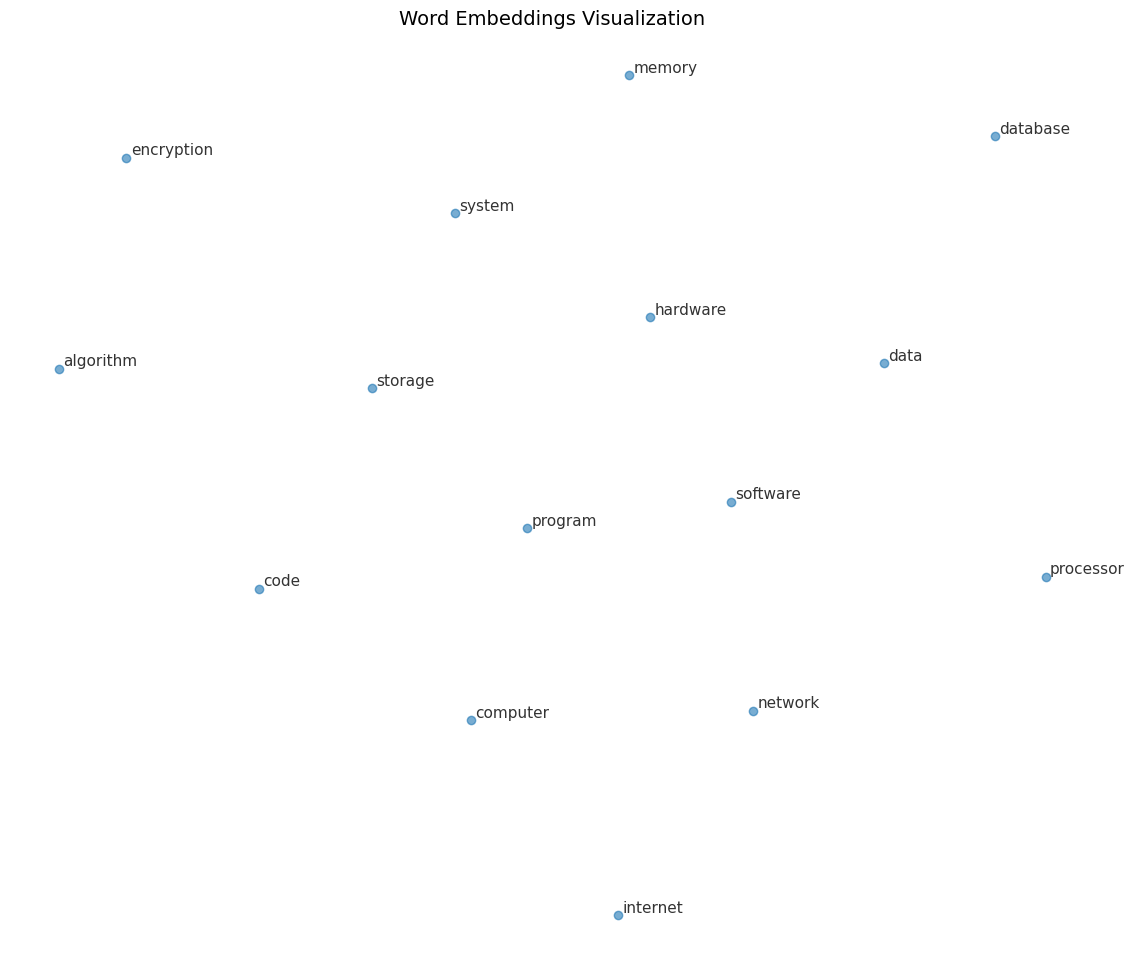

In [149]:
def tsne_plot(words, model, perplexity=12, learning_rate=200):
    valid_words = [word for word in words if word in model.wv]
    if not valid_words:
        print("No valid words to visualize")
        return
    
    vectors = np.array([model.wv[word] for word in valid_words])
    tsne = TSNE(n_components=2, random_state=42, 
                perplexity=perplexity, learning_rate=learning_rate)
    reduced = tsne.fit_transform(vectors)

    plt.figure(figsize=(14, 12))
    plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.6)
    
    for i, word in enumerate(valid_words):
        plt.annotate(
            word,
            (reduced[i, 0], reduced[i, 1]),
            xytext=(3, 2),
            textcoords='offset points',
            fontsize=11,
            alpha=0.8
        )
    
    plt.title("Word Embeddings Visualization", fontsize=14)
    plt.axis('off')
    plt.show()


tech_words = [
    'computer', 'software', 'hardware', 'data', 'algorithm',
    'network', 'internet', 'system', 'program', 'code',
    'encryption', 'database', 'processor', 'memory', 'storage'
]

tsne_plot(tech_words, model)

Word2Vec + Clustering

-KMeans

-HDBSCAN

Sample preprocessed sentences:
['sure', 'bashers', 'pens', 'fans', 'pretty', 'confused', 'lack', 'kind', 'posts', 'recent']
Epoch 1: Loss = 32,453.25
Epoch 2: Loss = 33,446.14
Epoch 3: Loss = 32,791.21
Epoch 4: Loss = 33,074.39
Epoch 5: Loss = 32,880.47
Epoch 6: Loss = 32,303.81
Epoch 7: Loss = 31,000.79
Epoch 8: Loss = 31,233.78
Epoch 9: Loss = 31,926.55
Epoch 10: Loss = 30,925.60


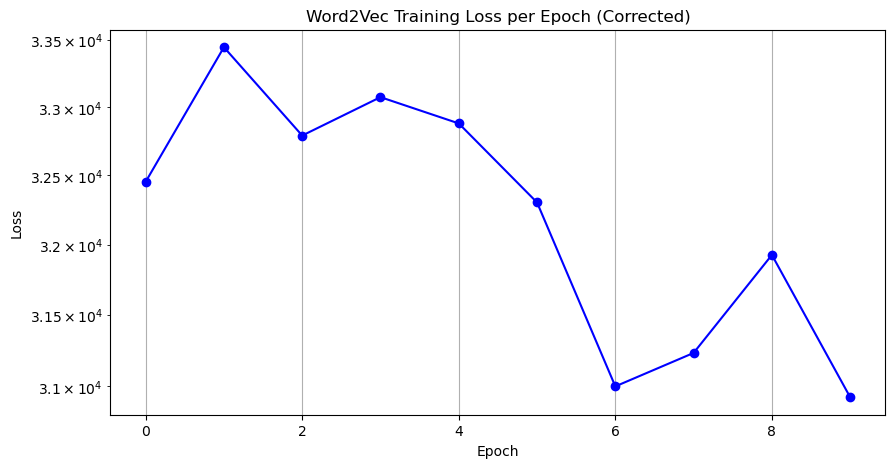


KMeans Inertia: 171.44
Silhouette Score: 0.2392

HDBSCAN Clusters Found: 2


In [154]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

# 1. Verify your input data first
print("Sample preprocessed sentences:")
print(sentences[0][:10])  # Should show actual words, not empty lists

# 2. Proper Word2Vec training with debug
model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=5,       # Ignore rare words
    sample=1e-5,       # Downsample frequent words
    hs=1,              # Use hierarchical softmax
    negative=5,        # Negative sampling
    workers=4,
    compute_loss=True,
    epochs=10
)

# 3. Train with proper loss tracking
loss_history = []
for epoch in range(10):
    model.train(
        sentences,
        total_examples=len(sentences),
        epochs=1,
        compute_loss=True
    )
    loss = model.get_latest_training_loss()
    loss_history.append(loss)
    print(f"Epoch {epoch+1}: Loss = {loss:,.2f}")  # Should show values in thousands

# 4. Plot with proper scaling
plt.figure(figsize=(10, 5))
plt.plot(loss_history, marker='o', linestyle='-', color='b')
plt.title('Word2Vec Training Loss per Epoch (Corrected)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.yscale('log')  # Log scale for better visualization
plt.show()


# 4. Clustering with KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Clustering Metrics
print(f"\nKMeans Inertia: {kmeans.inertia_:.2f}")  # Lower = better
print(f"Silhouette Score: {silhouette_score(X, cluster_labels):.4f}")  # Higher = better

# 5. Optional: HDBSCAN Clustering
try:
    import hdbscan
    clusterer = hdbscan.HDBSCAN(min_cluster_size=15)
    hdb_labels = clusterer.fit_predict(X)
    print(f"\nHDBSCAN Clusters Found: {len(np.unique(hdb_labels))-1}")
except ImportError:
    print("\nInstall hdbscan for density-based clustering: pip install hdbscan")
